In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import quantum as qm
import asymmetric as asym
import scipy.sparse as sparse
import scipy.linalg as la

In [3]:
levels = 13
data = np.zeros((3,2,levels))
for i, L in enumerate([8,10,12]):
    
    trials = 260 - 20*L
    rs = np.zeros((trials, levels))
    hs = np.logspace(-1,1, levels)
    
    # Only create these once
    H0 = asym.dense_H(L)
    _, _, _, sig_z_list = ([sig/2 for sig in sigs] for sigs in qm.get_sigma_lists(L))

    for idx, h in enumerate(hs):
        for j in range(trials):
            H_pert = qm.get_local_field(sig_z_list, np.random.rand(L)*2*h - h)/2
            H = H0 + H_pert
            choose = L//2
            rs[j, idx] = qm.get_r(asym.mat2list(H)[choose].A, nonz=True)

    data[i] = qm.mean_and_std(rs)
#     rs[i,0] = mean
#     rs[i,1] = std
    print(L)

8
10
12


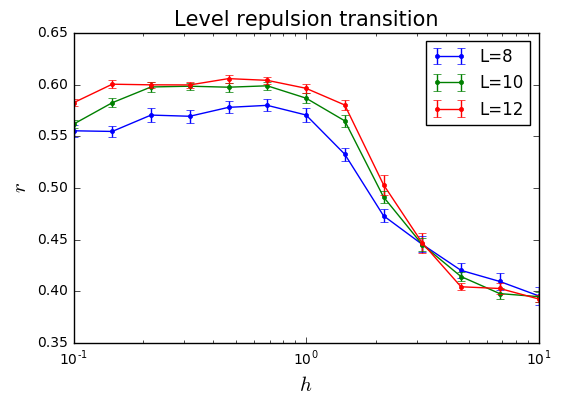

In [4]:
ax = plt.subplot(111)
for i, L in enumerate([8,10,12]):
    ax.set_xscale("log", nonposx='clip')
    ax.errorbar(
        hs,
        data[i,0],
        yerr = data[i,1],
        marker = '.',
        drawstyle = 'steps-mid-',
        label ='L='+str(L)
    )
    plt.xlabel('$h$', fontsize=15)
    plt.ylabel('$r$', fontsize=15)
#     plt.ylim(.4,.6)
plt.legend()
plt.xlim(1e-1,10)
plt.title("Level repulsion transition", fontsize=15)
plt.savefig("figures/levelrepultrans.pdf")
plt.show()

# Load data

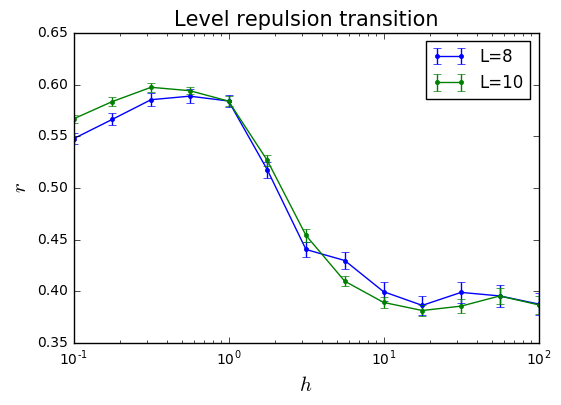

In [11]:
data = np.load("data/phasetrans.npy")
levels = 13
hs = np.logspace(-1,2, levels)
ax = plt.subplot(111)
for i, L in enumerate([8,10]):
    ax.set_xscale("log", nonposx='clip')
    ax.errorbar(
        hs,
        data[i,0],
        yerr = data[i,1],
        marker = '.',
        drawstyle = 'steps-mid-',
        label ='L='+str(L)
    )
    plt.xlabel('$h$', fontsize=15)
    plt.ylabel('$r$', fontsize=15)
#     plt.ylim(.4,.6)
plt.legend()
plt.xlim(1e-1,100)
plt.title("Level repulsion transition", fontsize=15)
# plt.savefig("figures/levelrepultrans.pdf")
plt.show()

In [2]:
val, _ = la.eigsh(X, sigma=0, k = 4, which="LA")
qm.chop(val)

NameError: name 'la' is not defined

In [ ]:
L = 8

H0 = asym.dense_H(L)
H0 = H0 + asym.init_pert(L, 4)
H0 = H0 + asym.finl_pert(L, 4)

alph2Sz, Sz2alph = asym.permutations(L)
plt.matshow(np.absolute(H0.A[alph2Sz][:,alph2Sz]))
plt.show()

In [ ]:
vals = np.array([-2,-1,0,1E-16, 3, 4, 5])
print('zeros:', sum(np.isclose(vals,0)))
vals = vals[np.isclose(np.isclose(vals,0),0)]
vals = vals[vals>0]
print(vals)

In [ ]:
mean = np.array([1,2,3,4])
np.append(mean, 5)
print(mean)
print(np.append(mean, 5))

In [9]:
mat = asym.mat2list(H)[choose].A
%timeit vals = la.eigvalsh(mat)
%timeit vals, vecs = la.eigh(mat)

1 loop, best of 3: 253 ms per loop
1 loop, best of 3: 538 ms per loop


In [33]:
a,b,c = ([x/2 for x in a] for a in ([1,2],[2,3],[3,4]))
b

[1.0, 1.5]

In [31]:
nested_list = [[1, 4], [9, 25]]
for i in [map(np.sqrt, x) for x in nested_list]: print(i)